# Handwritten digits recognizer with Convolutional Neaural Network (CNN)

This notebook presents a simple, but effective CNN applied to the MNIST handwritten digits dataset. The model to be used was built with TensorFlow.

## Data processing

The first step is to import all of the libraries needed for the project. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import zipfile

We read the two .csv  given for the project: the train set and the test set. The train set has one extra (the first column) column with the label of its respective image, so we can properly train the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/MNIST/train.csv')
test = pd.read_csv('/content/drive/MyDrive/MNIST/test.csv')


To use the data we have to transform the information given by the csv files to numpy arrays.

In [ ]:
trainimg = train.to_numpy()
trainimg.shape

(42000, 785)

As we can see, the images have 28x28 flatten pixels (one row with the 784 pixels), therefore we have to reshape the array so we can use it. In the next cell we show 8 random images from the dataset.

Digit: 0 9359
Digit: 0 20850
Digit: 2 21183
Digit: 0 19835
Digit: 8 1396
Digit: 5 14729
Digit: 2 21559
Digit: 1 18781


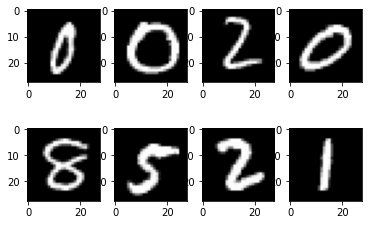

In [ ]:
img = []
for i in range(8):
  r = np.random.randint(0, len(trainimg))
  img.append(trainimg[r , 1:].reshape((28,28)))
  print(f'Digit: {trainimg[r ,0]}', r)

f, ax = plt.subplots(2,4)
for i in range(2):
  for j in range(4):
    ax[i][j].imshow(img[4*i+j], cmap='gray')


we do the same reshape with the test set.

In [ ]:
test_img = test.to_numpy().reshape(28000,28,28,1)
test_img.shape

(28000, 28, 28, 1)

## Convolutional Neural Network
Here is going to be used a CNN to classify the images of the MNIST handwritten digits database. To train the model we divide the the train set into the set of images and their respective labels. we also divide that set into two sets so we can use one of them to train the model and the other one to use as the validation set. 

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

train_x, train_y = train.to_numpy()[:,1:].reshape(42000,28,28,1), train.to_numpy()[:,0]

trainx, valx, trainy, valy = train_test_split(train_x, train_y, test_size=0.20)


Now we build the CNN. We are going to use one convolutional layer, a pooling layer, a hidden layer and an output layer. 

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])


Next, we define the optimizer, the loss function and the metrics to review. Here we also train the model using the numpy array previously defined with a fixed number of epochs.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epoch = 10
model_his = model.fit(
        trainx, trainy, epochs=epoch
    )

Epoch 1/10
1050/1050 [==============================] - 21s 20ms/step - loss: 1.0621 - accuracy: 0.8990
Epoch 2/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.1223 - accuracy: 0.9645
Epoch 3/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0716 - accuracy: 0.9783
Epoch 4/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0574 - accuracy: 0.9818
Epoch 5/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0410 - accuracy: 0.9869
Epoch 6/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0351 - accuracy: 0.9890
Epoch 7/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0347 - accuracy: 0.9893
Epoch 8/10
1050/1050 [==============================] - 20s 20ms/step - loss: 0.0275 - accuracy: 0.9921
Epoch 9/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0212 - accuracy: 0.9928
Epoch 10/10
1050/1050 [==============================] - 20s 19m

We check the accuracy and loss behaviour through the training. 

In [ ]:
x = np.arange(1, epoch + 1)
train_acc = model_his.history['accuracy']
train_loss = model_his.history['loss']

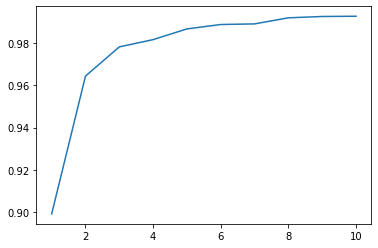

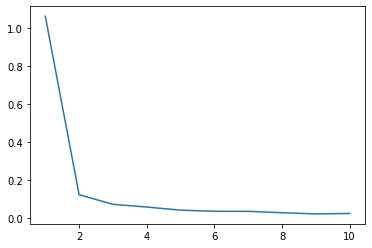

In [ ]:
plt.plot(x , train_acc)
plt.show()
plt.plot(x , train_loss)
plt.show()

Make the prediction for the instances from the test set. The next two cells create (or modify) the arrays so it can be used for the accuracy.

In [ ]:
prediction = model.predict(valx)
for i in range(len(prediction)):
  n = np.argmax(prediction[i,:])
  prediction[i,n] = 1
  prediction[i,:] = prediction[i,:].round()

In [ ]:
val_true = np.zeros((len(valy),10))

for i,j in enumerate(valy):
  val_true[i,j] = 1

Finally we compute the accuracy for the validation set.

In [ ]:
from sklearn.metrics import accuracy_score

my_accuracy = accuracy_score(val_true.astype('int32'), prediction.astype('int32'))
print('Accuracy: ', my_accuracy)


Accuracy:  0.9758333333333333


The following cell are used for the prediction of the test set (for the kaggle score).

In [ ]:
prediction_test = model.predict(test_img)
prediction_test.shape

(28000, 10)

In [ ]:
pred = np.zeros((28000,1))

for i in range(28000):
  pred[i] = np.argmax(prediction_test[i,:])

pred.shape

(28000, 1)

In [ ]:
ind = pd.DataFrame(np.arange(1,28001), columns=['ImageId'])

pred_sub = pd.DataFrame(pred.astype('int32'), columns=['Label'])
submission = [ind , pred_sub]
sub = pd.concat(submission, axis=1)

In [ ]:
compression_opts = dict(method='zip',
                        archive_name='submission.csv')  

sub.to_csv('submission.zip', index=False, compression=compression_opts)

In [ ]:
pd.read_csv('submission.zip')

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
